# Employee attrition

## Introduction

For this assignment I will explore data from IBM. The data obtains a HR analytics of Employee Attrition & Performance. I will predict the variable attrition for this assignment.

### Import

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df1 = pd.read_csv('HR_Employee_Attrition.csv')
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data cleaning 

### Get information on variables

In [2]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Subset
There are way too many columns. Based on my knowledge of the topic, I selected a few colums to find a correlation. These are based on factors what might influence the attrition. I assume things such as age, gender, hourly rate, distance, education, years at company and how satisfied the employee is, will have a correlation.

In [3]:
df = df1[['Attrition', 'Age', 'Gender', 'HourlyRate', 'DistanceFromHome', 'Education', 'YearsAtCompany', 'JobSatisfaction']]
df.head()
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Attrition         1470 non-null   object
 1   Age               1470 non-null   int64 
 2   Gender            1470 non-null   object
 3   HourlyRate        1470 non-null   int64 
 4   DistanceFromHome  1470 non-null   int64 
 5   Education         1470 non-null   int64 
 6   YearsAtCompany    1470 non-null   int64 
 7   JobSatisfaction   1470 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 92.0+ KB


## Dummy variables of the categorical variable

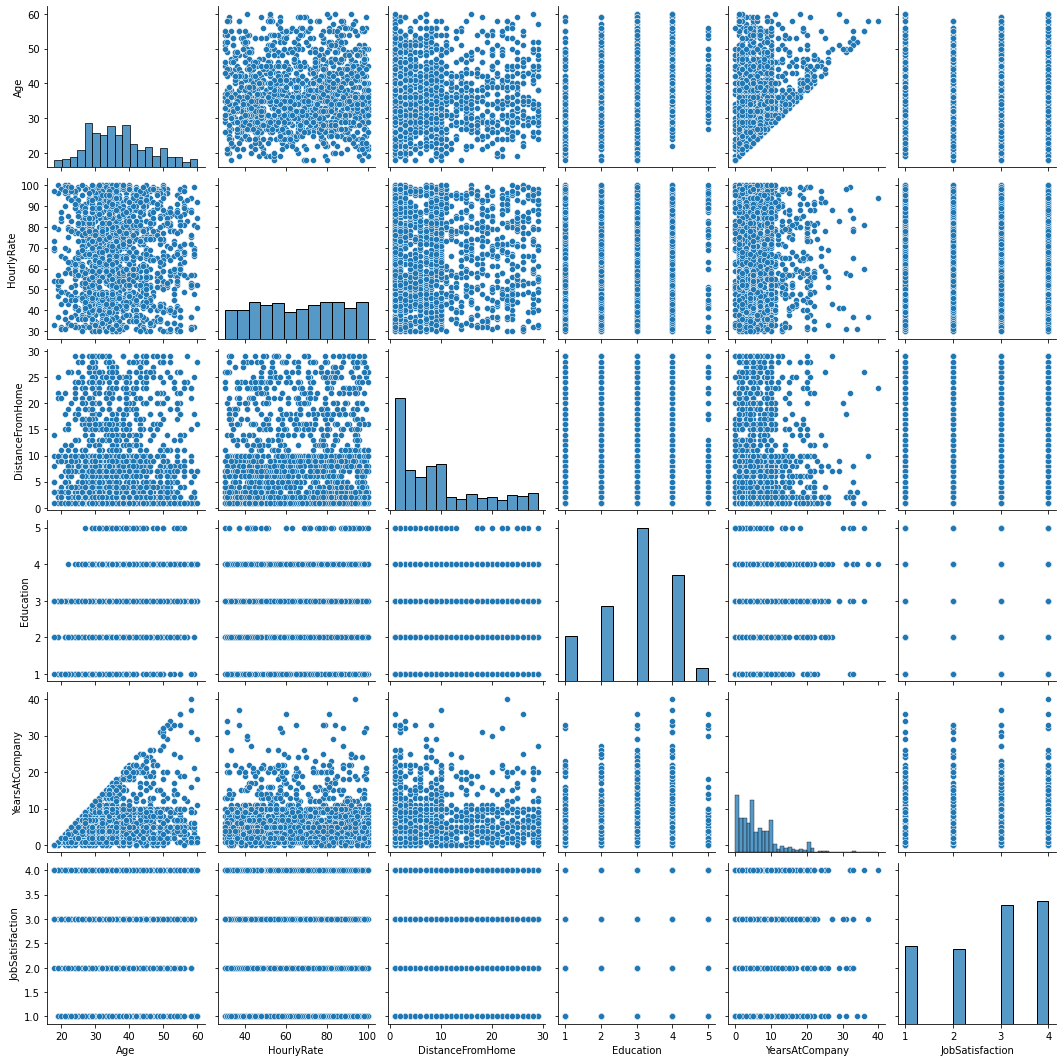

In [5]:
sns.pairplot(df)

### Add dummies to dataframe

As we can see in the pair plot we need to create dummy data for the catgorical variables. I have to do this for Attrition, gender, education, job satisfaction.

In [6]:
dummy_attrition = pd.get_dummies(df["Attrition"])
dummy_gender = pd.get_dummies(df["Gender"])
dummy_education = pd.get_dummies(df["Education"])
dummy_jobsatisfaction = pd.get_dummies(df["JobSatisfaction"])

df = pd.concat([df, dummy_attrition['Yes'], dummy_gender['Female'], dummy_education.iloc[:, 0:4], dummy_jobsatisfaction.iloc[:, 0:3]], axis=1)
df.head()

,Attrition,Age,Gender,HourlyRate,DistanceFromHome,Education,YearsAtCompany,JobSatisfaction,Yes,Female,1,2,3,4,1,2,3
0,Yes,41,Female,94,1,2,6,4,1,1,0,1,0,0,0,0,0
1,No,49,Male,61,8,1,10,2,0,0,1,0,0,0,0,1,0
2,Yes,37,Male,92,2,2,0,3,1,0,0,1,0,0,0,0,1
3,No,33,Female,56,3,4,8,3,0,1,0,0,0,1,0,0,1
4,No,27,Male,40,2,1,2,2,0,0,1,0,0,0,0,1,0


### Remove impossible values
Here I am looking for some outliers.

In [7]:
df['Attrition'].value_counts().sort_index()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
df['Gender'].value_counts().sort_index()

Female    588
Male      882
Name: Gender, dtype: int64

In [9]:
df['Age'].value_counts().sort_index()

18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
Name: Age, dtype: int64

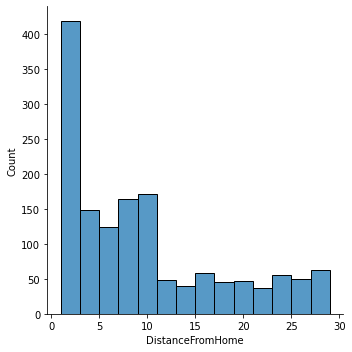

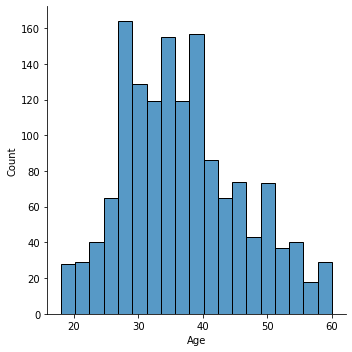

In [10]:
sns.displot(df['DistanceFromHome'])
plt.show()
sns.displot(df['Age'])
plt.show()

However, I don't think that this dataset has impossible values so for now I don't think I need to clean more.. Let's continue.

# Exploratory data analysis

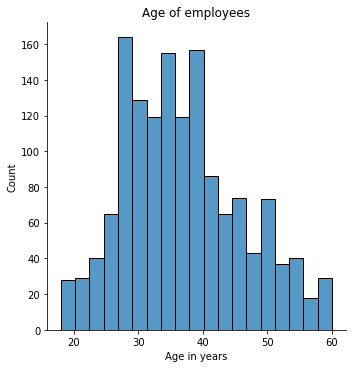

In [11]:
sns.displot(df['Age'].dropna(), kde=False)
plt.title('Age of employees')
plt.xlabel('Age in years')
plt.show()

Relation between age and attrition

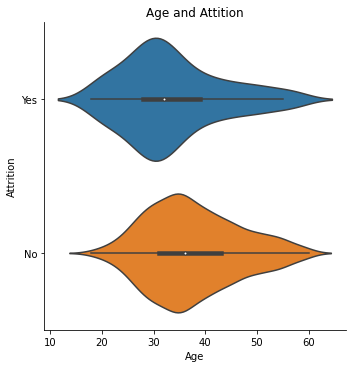

In [12]:
sns.catplot(x="Age", y="Attrition", kind="violin", data=df)
plt.title('Age and Attition')
plt.show()

In this violin graph you can see the relation between age and attition. You can see that the younger the age, it can lead to attrition.

#### Scatterplot matrix of the numerical variables

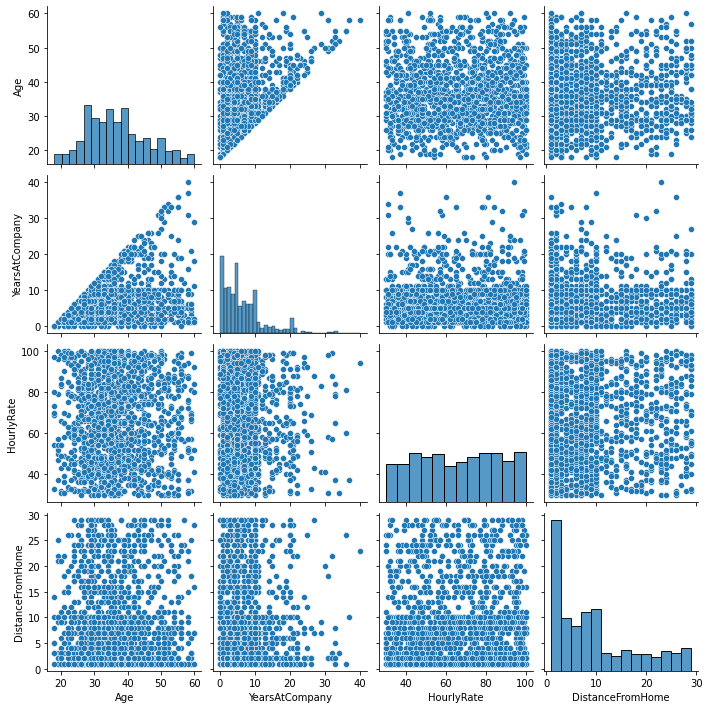

In [13]:
df_selection = df[['Age', 'YearsAtCompany', 'HourlyRate', 'DistanceFromHome']] 
sns.pairplot(df_selection)
plt.show()

In [14]:
corr = df[['Age', 'YearsAtCompany', 'DistanceFromHome', 'HourlyRate']].corr()
corr

,Age,YearsAtCompany,DistanceFromHome,HourlyRate
Age,1.000000,0.311309,-0.001686,0.024287
YearsAtCompany,0.311309,1.000000,0.009508,-0.019582
DistanceFromHome,-0.001686,0.009508,1.000000,0.031131
HourlyRate,0.024287,-0.019582,0.031131,1.000000


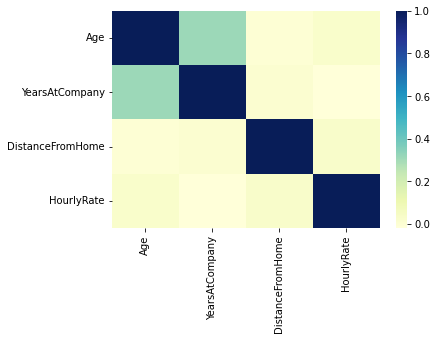

In [15]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")
plt.show()

This result is disappointing, I would say there should be a correlation between age, years at company and hourly rate but for now. There is only a slight correletion between Years at the company and Age. However, this is not compared to the attrition. SO let's continue.

# Predictive model
To build the model I created a X matrix and Y-variable ('Yes' from attrition). 

In [16]:
X = df[['Age', 'Female', 'HourlyRate', 'DistanceFromHome','YearsAtCompany', 'JobSatisfaction']] #create the X matrix

y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head()

,Age,Female,HourlyRate,DistanceFromHome,YearsAtCompany,JobSatisfaction
99,44,0,67,23,3,2
785,40,0,61,20,11,4
918,51,0,83,9,29,2
1335,39,0,41,19,2,4
1182,36,1,33,1,3,3


Next up I use the *KNeightborsClassifier* class from sklearn: 
This algorithm is a way to classify items based on their similarity to other items. This will be done with characteristics. To do so, I selected a value for K and compare this with the nearest neighbors.

In [17]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=3) #create a KNN-classifier with 3 neighbors
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

In [18]:
knn.n_samples_fit_

1029

## Model evaluation
To evaluate the model I check for the accuracy, precision and recall based on the test data.

In [19]:
knn.score(X_test, y_test)

0.782312925170068

The accuracy is 78.2%.

In [20]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[339,  25],
       [ 71,   6]])

Now, I'll dubble check which row is which label.

In [21]:
knn.classes_

array(['No', 'Yes'], dtype=object)

In [22]:
conf_matrix = pd.DataFrame(cm, index=['No (actual)', 'Yes (actual)'], columns = ['No (predicted)', 'Yes (predicted)']) 
conf_matrix

,No (predicted),Yes (predicted)
No (actual),339,25
Yes (actual),71,6


### Accuracy
Calculate the accuracy again.

In [23]:
(339+6)/(339+25+71+6)

0.782312925170068

The accuarcy is correct: 78.2%

### Precision of Attrition 'Yes'
This is the number of correctly predicted 'Yes', divided by the total number of predicted 'Yes. Remember: how "precise" am I in saying employees attrition?

In [24]:
6/(25+6)

0.1935483870967742

Precision is 19.4%. This is way worse than accuracy..

### Recall of Attrition 'Yes'
Calculate the recall.

In [25]:
6/(71+6)

0.07792207792207792

So 0.08%. So this is really bad.. however, this was to be expected.. there are only 6 'yes's'. 
I'll double check, if I did this correctly.

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.83      0.93      0.88       364
         Yes       0.19      0.08      0.11        77

    accuracy                           0.78       441
   macro avg       0.51      0.50      0.49       441
weighted avg       0.72      0.78      0.74       441



'Yes' is just one outcome. Apparently the model is better in predicting 'No'. 
SO to be sure, I made a for loop for 10 neigbors.

In [27]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) 
    knn_new = knn_new.fit(X_train, y_train) 
    y_test_pred_new = knn_new.predict(X_test) 
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new))

With 1 neighbors the result is:
              precision    recall  f1-score   support

          No       0.85      0.87      0.86       364
         Yes       0.31      0.29      0.30        77

    accuracy                           0.77       441
   macro avg       0.58      0.58      0.58       441
weighted avg       0.76      0.77      0.76       441

With 2 neighbors the result is:
              precision    recall  f1-score   support

          No       0.83      0.98      0.90       364
         Yes       0.31      0.05      0.09        77

    accuracy                           0.81       441
   macro avg       0.57      0.51      0.49       441
weighted avg       0.74      0.81      0.76       441

With 3 neighbors the result is:
              precision    recall  f1-score   support

          No       0.83      0.93      0.88       364
         Yes       0.19      0.08      0.11        77

    accuracy                           0.78       441
   macro avg       0.51      0.5

# Conclusion
It is better to predict if an employee leads to No attrition. So to be honest, it is not really reliable. The next time I would use different variables to try to see if these would predict better outcomes.